##### https://theautomatic.net/yahoo_fin-documentation/ (使用文檔)
##### https://theautomatic.net/2018/01/25/coding-yahoo_fin-package/  (財報, 現金流, 股東組成 ...等相關資料)
##### https://theautomatic.net/2020/05/05/how-to-download-fundamentals-data-with-python/  (PE / PS / PB ratio, ROA, ROE ...等相關資料)

In [2]:
import yahoo_fin.stock_info as si
import pandas as pd

In [22]:
# 列出所有yfinance上的指數包含台股   台指：^TWII、電子：^TELI、金融：^TFNI
import requests

url = "https://finance.yahoo.com/world-indices/"
response = requests.get(url)

import io
f = io.StringIO(response.text)
dfs = pd.read_html(f)
world_index = dfs[0]
world_index

In [21]:
# #爬取過往指數的價錢並繪製圖片 https://www.finlab.tw/Python%E6%96%B0%E6%89%8B%E6%95%99%E5%AD%B84%E7%9B%B8%E9%97%9C%E6%80%A7%E5%88%86%E6%9E%90/

# import json
# import requests
# import datetime
# import pandas as pd
# import numpy as np

# def crawl_price(stock_id):

#     d = datetime.datetime.now()
#     url = "https://query1.finance.yahoo.com/v8/finance/chart/"+stock_id+"?period1=0&period2="+str(int(d.timestamp()))+"&interval=1d&events=history&=hP2rOschxO0"

#     response = requests.get(url)

#     if (response.status_code != 204 and response.headers["content-type"].strip().startswith("application/json")):
#         try:
#             data = json.loads(response.text)
#             df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
#             return df
#         except ValueError:
#             return False

# import time
# world_index_history = {}
# for symbol, name in zip(world_index['Symbol'], world_index['Name']):
    
#     print(name)
    
#     world_index_history[name] = crawl_price(symbol)
#     time.sleep(5)
    
    
# for name, history in world_index_history.items():
#     history.close.plot()

In [14]:
# si.get_data("2330.TW") # gets Netflix's data
# si.get_dividends("msft")
# si.get_earnings('nflx')

# si.get_quote_table("aapl") # PE ratio 
# si.tickers_other('taiex')


In [15]:
# # get list of Dow tickers
# dow_list = si.tickers_dow()
 
 
# # Get data in the current column for each stock's valuation table
# dow_stats = {}
# for ticker in dow_list:
#     temp = si.get_stats_valuation(ticker)
#     temp = temp.iloc[:,:2]
#     temp.columns = ["Attribute", "Recent"]
 
#     dow_stats[ticker] = temp
 
 
# # combine all the stats valuation tables into a single data frame
# combined_stats = pd.concat(dow_stats)
# combined_stats = combined_stats.reset_index()
 
# del combined_stats["level_1"]
 
# # update column names
# combined_stats.columns = ["Ticker", "Attribute", "Recent"]

In [208]:
# strMode = 2: 上市公司  4: 上櫃公司

import requests
import pandas as pd

res = requests.get("http://isin.twse.com.tw/isin/C_public.jsp?strMode=2")

df = pd.read_html(res.text)[0]

# 設定column名稱
df.columns = df.iloc[0]
# 刪除第一行
df = df.iloc[1:]

df = df.dropna(thresh=3, axis=0).dropna(thresh=3, axis=1)

df = df.set_index('有價證券代號及名稱')
df

0             國際證券辨識號碼(ISIN Code)         上市日 市場別   產業別 CFICode   備註
有價證券代號及名稱                                                           
股票                             股票          股票  股票    股票      股票   股票
1101　台泥              TW0001101004  1962/02/09  上市  水泥工業  ESVUFR  NaN
1102　亞泥              TW0001102002  1962/06/08  上市  水泥工業  ESVUFR  NaN
1103　嘉泥              TW0001103000  1969/11/14  上市  水泥工業  ESVUFR  NaN
1104　環泥              TW0001104008  1971/02/01  上市  水泥工業  ESVUFR  NaN
...                           ...         ...  ..   ...     ...  ...
01002T　土銀國泰R1        TW00001002T6  2005/10/03  上市   NaN  CBCIXU  NaN
01004T　土銀富邦R2        TW00001004T2  2006/04/13  上市   NaN  CBCIXU  NaN
01007T　兆豐國泰R2        TW00001007T5  2006/10/13  上市   NaN  CBCIXU  NaN
01009T　王道圓滿R1        TW00001009T1  2018/06/21  上市   NaN  CBCIXU  NaN
01010T　京城樂富R1        TW00001010T9  2018/12/05  上市   NaN  CBCIXU  NaN

[34615 rows x 6 columns]

In [68]:
import requests
import pandas as pd
import numpy as np

def crawl_financial(url, year, season, exchange):
    r = requests.post(url, {
        'encodeURIComponent':1,
        'step':1,
        'firstin':1,
        'off':1,
        'TYPEK':exchange,
        'year':str(year),
        'season':str(season),
    })

    r.encoding = 'utf8'
    return pd.read_html(r.text, header=None)


def financial_statement(year, season, exchange='sii', type='綜合損益彙總表'):
     # 一些參數：TYPEK => 市場別 sii>上市 otc>上櫃 rotc>興櫃 pub>公開發行 year => 年度 season => 季別
    if year >= 1000:
        year -= 1911

    if type == '綜合損益彙總表':
        url = 'https://mops.twse.com.tw/mops/web/ajax_t163sb04'
        dfs = crawl_financial(url, year, season, exchange)
        return pd.concat(dfs[1:], axis=0, sort=False).set_index(pd.concat(dfs[1:], axis=0, sort=False).columns[0]).apply(lambda s: pd.to_numeric(s, errors='ignore'))
    elif type == '資產負債彙總表':
        url = 'https://mops.twse.com.tw/mops/web/ajax_t163sb05'
        dfs = crawl_financial(url, year, season, exchange)
        return pd.concat(dfs[1:], axis=0, sort=False).set_index(pd.concat(dfs[1:], axis=0, sort=False).columns[0]).apply(lambda s: pd.to_numeric(s, errors='ignore'))
    elif type == '營益分析彙總表':
        url = 'https://mops.twse.com.tw/mops/web/ajax_t163sb06'
        dfs = crawl_financial(url, year, season, exchange)
        
        for i, df in enumerate(dfs):
            df.columns = df.iloc[0]
            dfs[i] = df.iloc[1:]

            df = df[df['公司代號'] != '公司代號']
            df = df[~df['公司代號'].isnull()]
            if any(df.columns.str.contains("合計：")):
                df = df.loc[:, ~df.columns.str.contains("合計：")]
            return df
    else:
        return ValueError('type does not match')

financial_statement(2020, 2, 'rotc',type='營益分析彙總表')

0    公司代號  公司名稱 營業收入 (百萬元) 毛利率(%) (營業毛利)/ (營業收入) 營業利益率(%) (營業利益)/ (營業收入)  \
1    1260   富味鄉    1758.24                 10.50                    1.36   
2    1269    乾杯    1190.24                 49.25                   -2.05   
3    1271  晨暉生技     155.51                 65.67                   42.27   
4    1293    利統     180.48                 44.52                    7.56   
5    1343  旭東環保     112.45                 22.30                    1.21   
..    ...   ...        ...                   ...                     ...   
198  8329    台視     473.09                  5.70                  -19.74   
199  8359    錢櫃    1544.29                 56.39                   23.52   
200  8458    影一      20.67                 21.80                  -46.40   
201  8487   愛爾達     183.94                 18.33                   -3.92   
202  9957    燁聯   18440.14                 -2.46                   -6.43   

0   稅前純益率(%) (稅前純益)/ (營業收入) 稅後純益率(%) (稅後純益)/ (營業收入)  
1                      0.27                    0.48  
2                     -3.13                   -3.00  
3                     42.07                   42.07  
4                      7.30                    7.18  
5                      1.29                    1.56  
..                      ...                     ...  
198                   -9.96                  -10.37  
199                   25.65                   18.86  
200                  -43.95                  -43.95  
201                    0.10                   -0.08  
202                  -10.41                   -9.98  

[190 rows x 7 columns]

In [62]:
# si.get_data("01002T.TW")

https://www.youtube.com/watch?v=gX04AaMrCq0

### 個股選股標準: 
#### 1. 近五年營業收入正成長 2. 近五年稅後淨利正成長 3. 股東權益報酬率(ROE)長年維持15%或以上 4. 近五年毛利率穩定向上 5. 近五年現金股利正成長 (公司有維持賺錢但現金股利變少 => 財報有問題)
#### 總報酬本益比公式: 1. 總報酬率=盈餘成長率+收益率(殖利率) 2. 總報酬率本益比=總報酬率/本益比 3. 總報酬率本益比買賣標準:高於1.2(高於1.6更好)—股價被低估-->買進 0.8-1.2—股價合理不買不賣 低於0.8—股價被高估賣出 



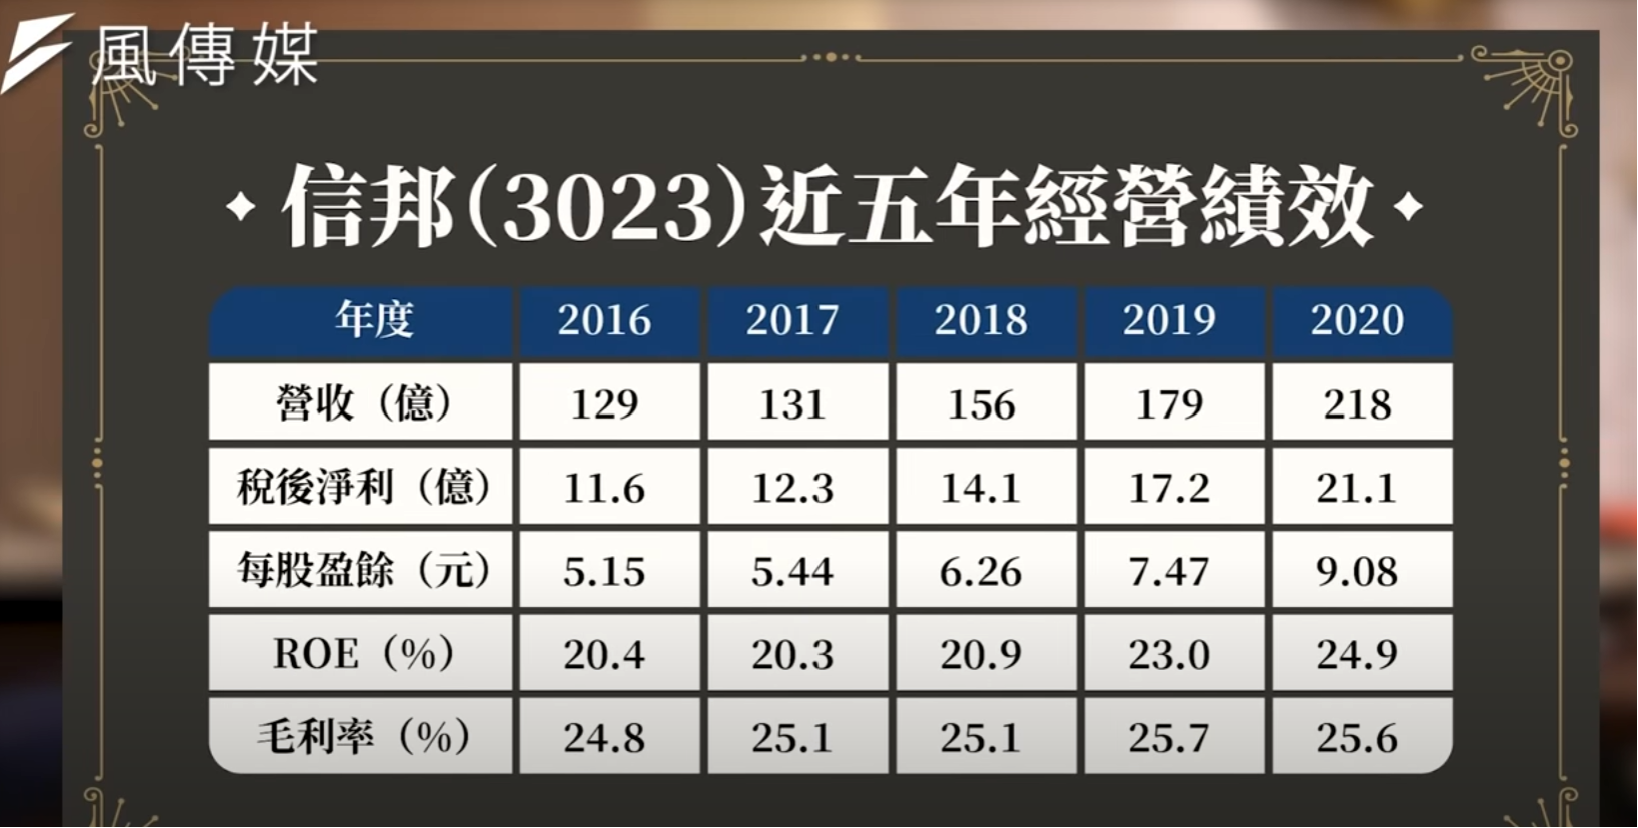

![螢幕擷取畫面 2024-01-06 121452.png](<attachment:螢幕擷取畫面 2024-01-06 121452.png>)

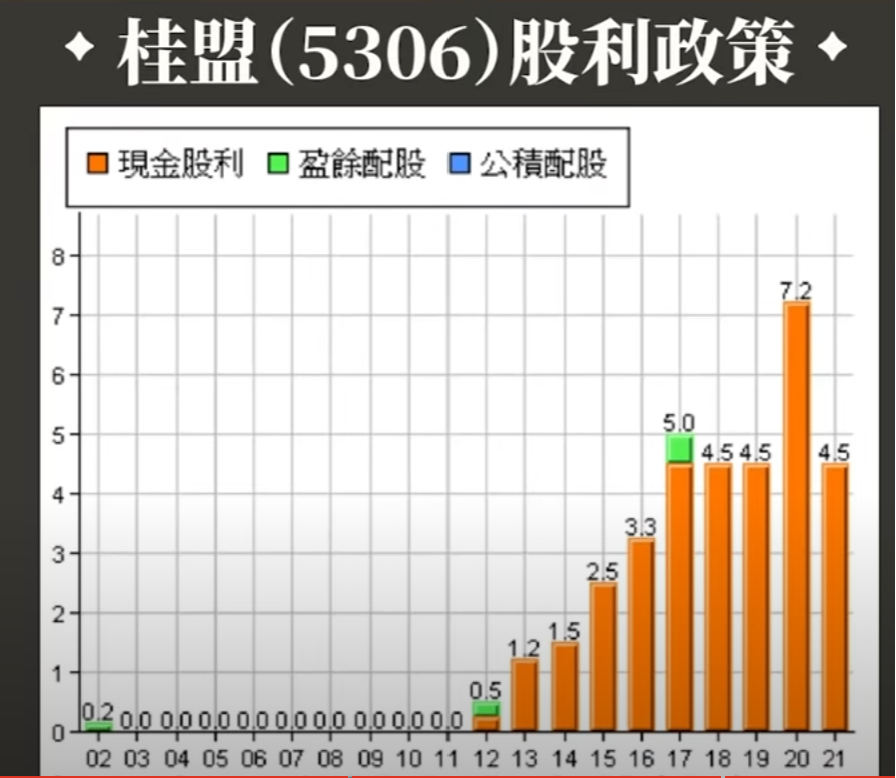


##### 個股暴雷: 1. 現金股利衰退 2. 大股東賣持股 3. 公司誠信
##### 現金股利衰退跡象(賺錢變多但配股利變少 前一年:5, 今年:0.1)
##### 配股0.1之後大股東賣股票(加上現金股利衰退 => 公司很缺錢)
##### 現金股利衰退是檢視現金流表的方法
##### 公司如果持續很賺錢, 大股東卻還開始賣股票(有些隱情)
##### 選股後先google查看個股是否曾經有不實的狀況
![螢幕擷取畫面 2024-01-06 122144.png](<attachment:螢幕擷取畫面 2024-01-06 122144.png>)
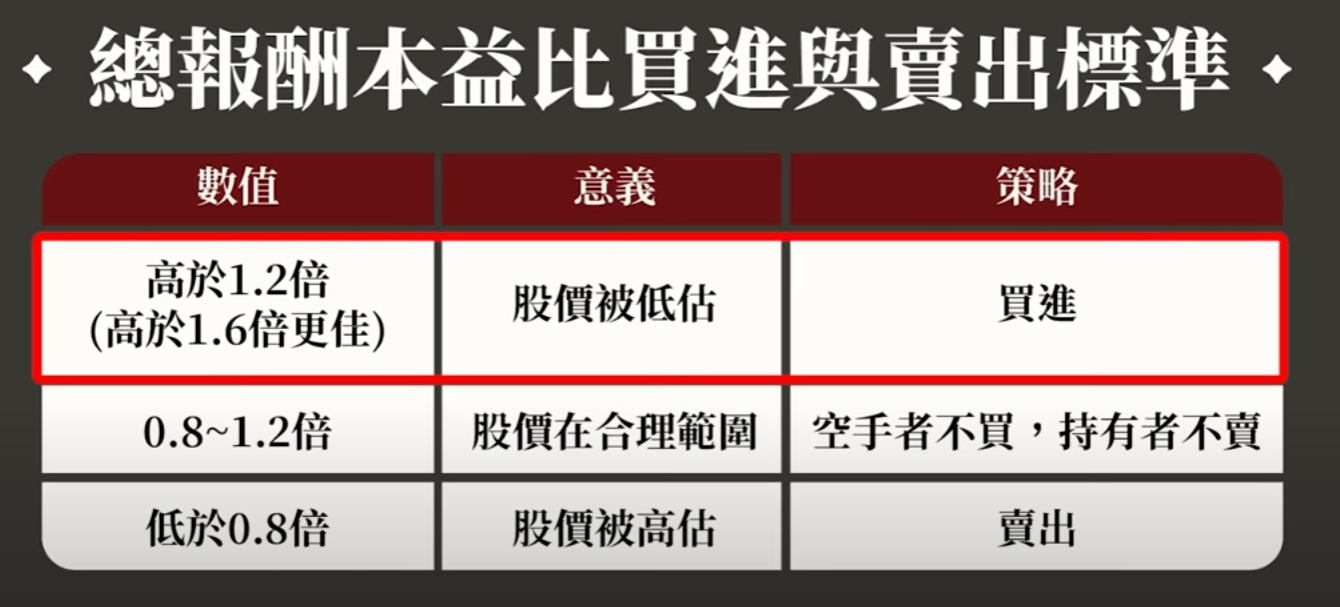
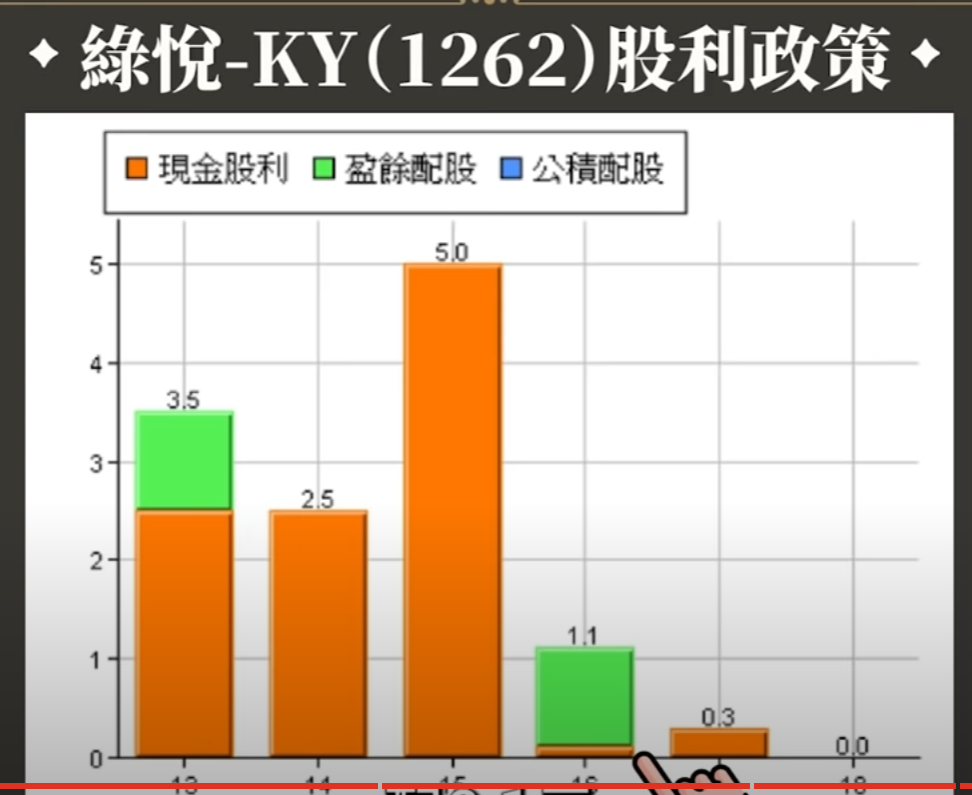

https://medium.com/pythonstock/%E5%86%A0%E8%BB%8D%E9%81%B8%E8%82%A1%E7%AD%96%E7%95%A5-%E9%99%84%E8%B4%88python%E7%A8%8B%E5%BC%8F%E7%A2%BC-3095f2f62e91

### 選股程式碼

In [54]:
%run .\程式金融類\冠軍選股策略\choose_stock1.py

某日股票url 2020-07-15 00:00:00 http://www.twse.com.tw/exchangeReport/BWIBBU_d?date=20200715&selectType=ALL&response=json&_=1704878051.327008
     證券代號 證券名稱 殖利率(%)  股利年度    本益比 股價淨值比  財報年/季
602  3543   州巧   4.48   108  14.51  0.45  109/1
某年某季財報 https://mops.twse.com.tw/server-java/t164sb01?step=1&CO_ID=3543&SYEAR=2020&SSEASON=4&REPORT_ID=C
即時股價 https://tw.stock.yahoo.com/q/q?s=3543
三大法人買賣 https://www.twse.com.tw/rwd/zh/fund/T86?date=20240105&selectType=ALL&response=json
三大法人買賣 https://www.twse.com.tw/rwd/zh/fund/T86?date=20240106&selectType=ALL&response=json
三大法人買賣 https://www.twse.com.tw/rwd/zh/fund/T86?date=20240107&selectType=ALL&response=json
三大法人買賣 https://www.twse.com.tw/rwd/zh/fund/T86?date=20240108&selectType=ALL&response=json
三大法人買賣 https://www.twse.com.tw/rwd/zh/fund/T86?date=20240109&selectType=ALL&response=json
the result of candidate ['3543']


In [1]:
%run .\chooseStock.py

獲取日期: 2024-01-16 10:43:22.015307
某年某季財報 https://mops.twse.com.tw/server-java/t164sb01?step=1&SYEAR=2023&REPORT_ID=C&CO_ID=1102&SSEASON=3
self table data [<table style="width:90%">
<tr><th colspan="5"><span class="zh">資產負債表</span><span class="en">Balance Sheet</span></th></tr>
<tr>
<th><span class="zh">代號</span><span class="en">Code</span></th>
<th><span class="zh">會計項目</span><span class="en">Accounting Title</span></th>
<th><span class="zh">2023年9月30日</span><span class="en">2023/9/30</span></th>
<th><span class="zh">2022年12月31日</span><span class="en">2022/12/31</span></th>
<th><span class="zh">2022年9月30日</span><span class="en">2022/9/30</span></th>
</tr>
<tr>
<td style="text-align:center"></td>
<td><span class="zh">資產</span><span class="en">Assets</span></td>
<td class="amt"></td>
<td class="amt"></td>
<td class="amt"></td>
</tr>
<tr>
<td style="text-align:center"></td>
<td><span class="zh">　流動資產</span><span class="en">　Current assets</span></td>
<td class="amt"></td>
<td class="amt"><